<a href="https://colab.research.google.com/github/Kevin-Guerra95/coolab/blob/main/Proyecto_Zara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/Zara_sales_EDA.csv', sep=';')
display(df.head())

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [7]:
display(df.info()) #informacion y datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12963 entries, 0 to 12962
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        12963 non-null  int64  
 1   Product Position  12963 non-null  object 
 2   Promotion         12963 non-null  object 
 3   Product Category  12963 non-null  object 
 4   Seasonal          12963 non-null  object 
 5   Sales Volume      12963 non-null  int64  
 6   brand             12963 non-null  object 
 7   url               12963 non-null  object 
 8   name              12962 non-null  object 
 9   description       12961 non-null  object 
 10  price             12962 non-null  float64
 11  currency          12962 non-null  object 
 12  terms             12962 non-null  object 
 13  section           12962 non-null  object 
 14  season            12962 non-null  object 
 15  material          12962 non-null  object 
 16  origin            12962 non-null  object

None

In [8]:
df.isnull().sum() # confirmacion de datos nulos


,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
name,1
description,2


In [9]:
df.describe() #estadísticas descriptivas

,Product ID,Sales Volume,price
count,12963.00000,12963.000000,12962.000000
mean,204964.13824,1099.044588,41.760984
std,8901.28930,298.641295,23.308831
min,110075.00000,518.000000,12.000000
25%,202620.50000,849.000000,22.990000
50%,205861.00000,992.000000,35.950000
75%,209101.50000,1365.000000,52.990000
max,212342.00000,1940.000000,134.990000


In [10]:
# conteo de de valores
print(df['brand'].value_counts().to_frame())
print(df['currency'].value_counts().to_frame())
print(df['Product Category'].value_counts().to_frame())
print(df['terms'].value_counts().to_frame())

       count
brand       
Zara   12963
          count
currency       
USD       12962
                  count
Product Category       
clothing          12963
          count
terms          
jackets    7173
sweaters   2116
t-shirts   1688
shoes      1558
jeans       427


In [11]:
#eliminamos todas las columnas que no vamos a utilizar, ya que los datos son redundantes como brand
df.drop(['Product ID', 'Product Category', 'brand', 'url', 'description', 'currency'], axis=1, inplace=True, errors='ignore')

In [12]:
df. head()

,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section,season,material,origin
0,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,jackets,MAN,Winter,Polyester,Brazil
1,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,jackets,MAN,Autumn,Cotton,Turkey
2,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,jackets,WOMAN,Autumn,Polyester,Morocco
3,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,jackets,MAN,Spring,Polyester,China
4,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,jackets,WOMAN,Winter,Wool Blend,China


In [13]:
#limpiamos el nombre de las columnas, para eliminar espacios
df.columns = df.columns.str.strip()
df.columns


Index(['Product Position', 'Promotion', 'Seasonal', 'Sales Volume', 'name',
       'price', 'terms', 'section', 'season', 'material', 'origin'],
      dtype='object')

In [14]:
#renombramos las columnas, para estandarizar los nombres
df = df.rename(columns={
    'price': 'Price',
    'terms': 'Terms',
    'section': 'Section',
    'season': 'Season',
    'material': 'Material',
    'origin': 'Origin',
    'name':'Name'
})

In [15]:
#verificamos de nuevo los datos nulos
df.isna().sum().sort_values()

,0
Product Position,0
Promotion,0
Seasonal,0
Sales Volume,0
Name,1
Price,1
Terms,1
Section,1
Season,1
Material,1


In [16]:
#verificamos valores duplicados en cada fila
duplicate_rows_df = df[df.duplicated()]
print("numero de filas duplicados: ", duplicate_rows_df.shape),

dups = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
dups

numero de filas duplicados:  (0, 11)


,Product Position,Promotion,Seasonal,Sales Volume,Name,Price,Terms,Section,Season,Material,Origin


In [17]:
#eliminamos valores duplicados, ya que el numero de los mismos no sesgan el resultado
df.drop_duplicates(inplace=True)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product Position,12963,3,Aisle,5031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promotion,12963,2,No,7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seasonal,12963,2,No,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Volume,12963.0,NaN,NaN,NaN,1099.044588,298.641295,518.0,849.0,992.0,1365.0,1940.0
Name,12962,11461,PLAID OVERSHIRT,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,12962.0,NaN,NaN,NaN,41.760984,23.308831,12.0,22.99,35.95,52.99,134.99
Terms,12962,5,jackets,7173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,12962,2,WOMAN,8503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,12962,4,Autumn,4982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material,12962,11,Cotton,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terminamos con el EDa, continuamos con el analisis anivariable

In [20]:
#importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline #para que se ejecute el grafico en la misma linea
sns.set(color_codes=True)

In [21]:
#cargamos el metodo, para ocultar alertas futuras
import warnings

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*use_inf_as_na.*"
)

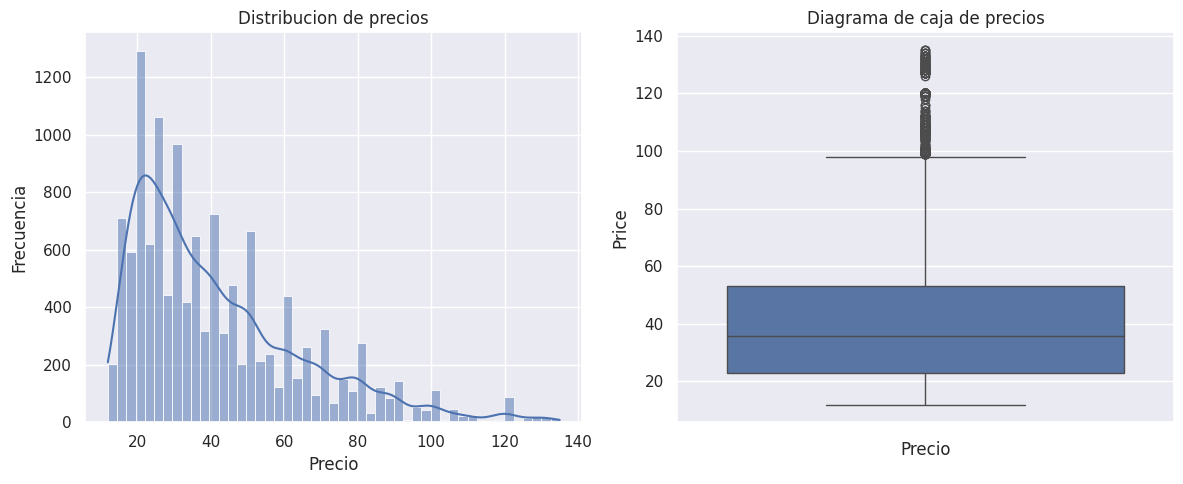

In [30]:
#Histograma y diagrama de caja, para la frecuencia de precios
fig, ax = plt.subplots(1, 2,figsize=(12, 5)) #creamos el lienzo con dos subgraficos y definimos el tamaño

#Histograma
sns.histplot(df['Price'], kde=True, ax=ax[0])
ax[0].set_title('Distribucion de precios')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

#Diagrama de caja
sns.boxplot(df['Price'], ax=ax[1])
ax[1].set_title('Diagrama de caja de precios')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()



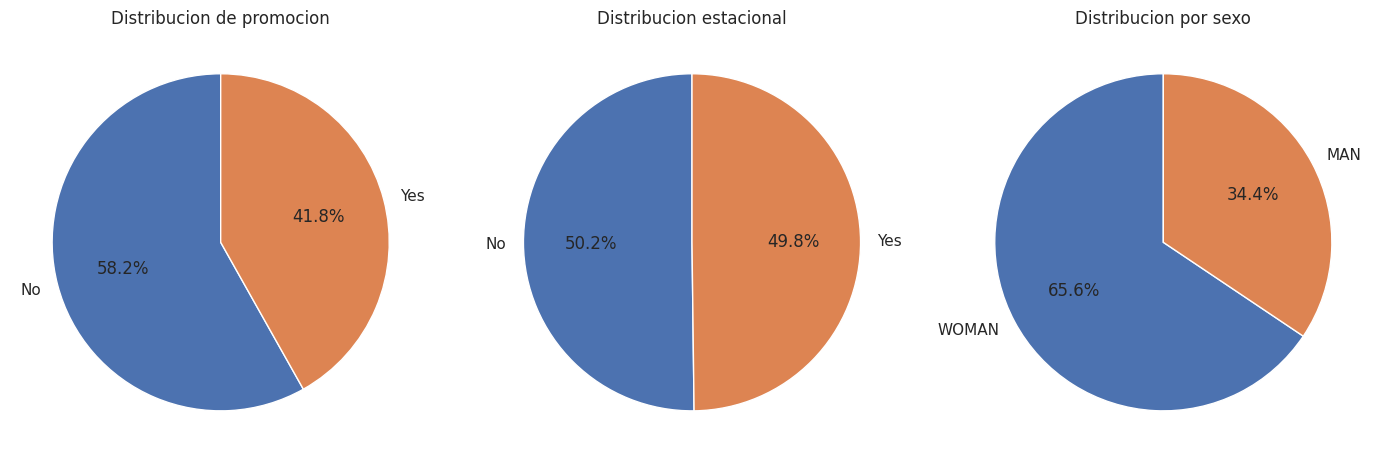

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6)) #creamos el lienzo con tres graficos

#creamos un grafico de Torta, para promocion, Estacion y sexo. determinando la distribucion
df['Promotion'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[0],
    wedgeprops={'edgecolor': 'white'})

axes[0].set_title('Distribucion de promocion')
axes[0].set_ylabel('')

df['Seasonal'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[1],
    wedgeprops={'edgecolor': 'white'})

axes[1].set_title('Distribucion estacional')
axes[1].set_ylabel('')


df['Section'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[2],
    wedgeprops={'edgecolor': 'white'})

axes[2].set_title('Distribucion por sexo')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

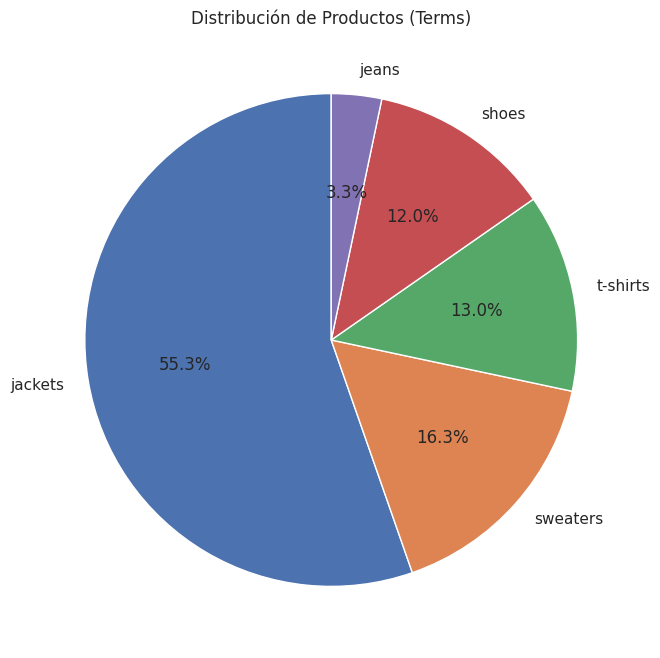

In [51]:
#creamos un grafico adicional, para determinar el tipo de prendas mas vendidas
plt.figure(figsize=(8, 8))
df['Terms'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribución de Productos (Terms)')
plt.ylabel('') # Ocultar la etiqueta del eje y
plt.show()

/tmp/ipython-input-1995176888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_origin.index, y=sales_by_origin.values, palette='viridis')


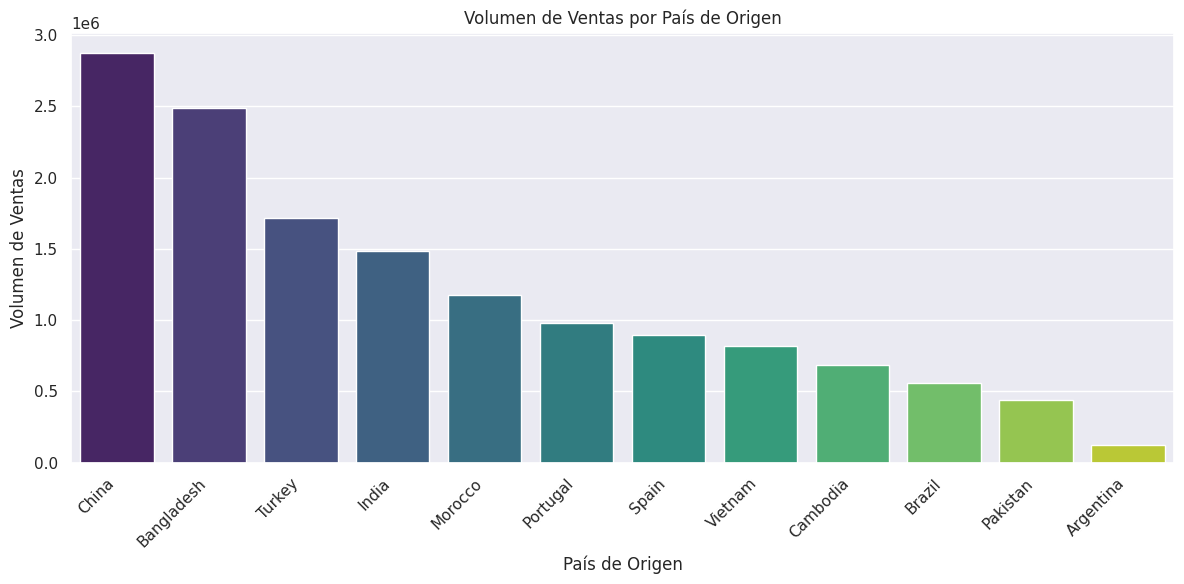

In [53]:
sales_by_origin = df.groupby('Origin')['Sales Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_origin.index, y=sales_by_origin.values, palette='viridis')
plt.title('Volumen de Ventas por País de Origen')
plt.xlabel('País de Origen')
plt.ylabel('Volumen de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3413786263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_season.values, y=sales_by_season.index, palette='viridis')


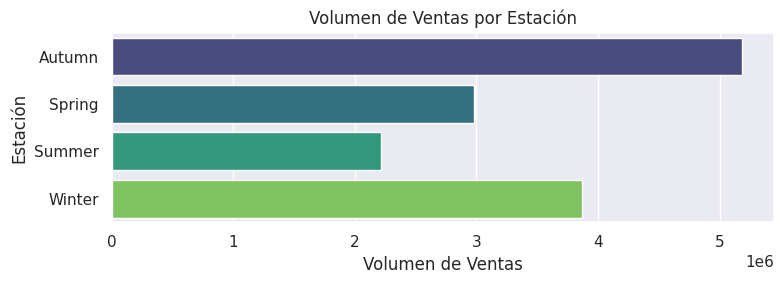

In [69]:
plt.figure(figsize=(8, 3))
sns.barplot(x=sales_by_season.values, y=sales_by_season.index, palette='viridis')
plt.title('Volumen de Ventas por Estación')
plt.xlabel('Volumen de Ventas')
plt.ylabel('Estación')
plt.tight_layout()
plt.show()

Analisis Multivariable

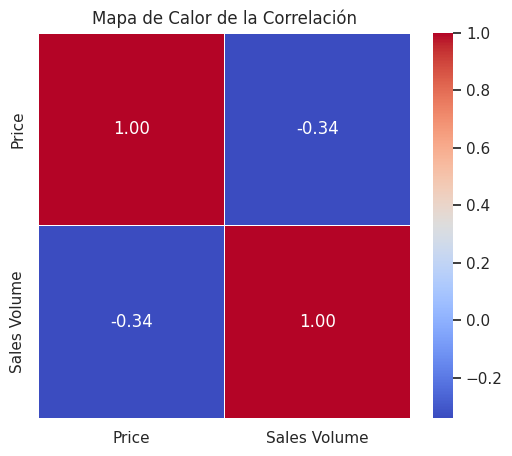

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()

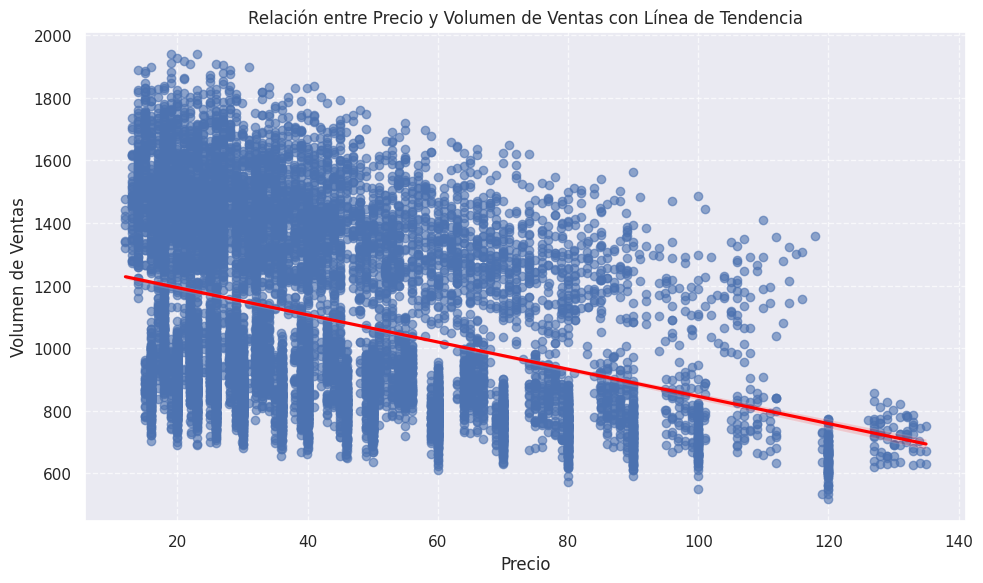

Coeficiente de correlación entre Precio y Volumen de Ventas: -0.34


In [68]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Sales Volume', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relación entre Precio y Volumen de Ventas con Línea de Tendencia')
plt.xlabel('Precio')
plt.ylabel('Volumen de Ventas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Assuming df_corr is available from previous steps
if 'df_corr' in locals() and 'Price' in df_corr.index and 'Sales Volume' in df_corr.columns:
    print(f"Coeficiente de correlación entre Precio y Volumen de Ventas: {df_corr.loc['Price', 'Sales Volume']:.2f}")
else:
    print("No se pudo calcular el coeficiente de correlación.")